In [72]:
import numpy
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.linear_model import LinearRegression

In [73]:
df = pd.read_csv ('games_details.csv', index_col=0, delimiter=',', encoding='latin-1')
df


C:\Users\camil\AppData\Local\Temp\ipykernel_6076\296774311.py:1: DtypeWarning: Columns (6) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv ('games_details.csv', index_col=0, delimiter=',', encoding='latin-1')


,TEAM_ID,TEAM_ABBREVIATION,TEAM_CITY,PLAYER_ID,PLAYER_NAME,NICKNAME,START_POSITION,COMMENT,MIN,FGM,...,OREB,DREB,REB,AST,STL,BLK,TO,PF,PTS,PLUS_MINUS
GAME_ID,,,,,,,,,,,,,,,,,,,,,
22100213,1610612764,WAS,Washington,203484,Kentavious Caldwell-Pope,Kentavious,F,NaN,27:41,1.0,...,1.0,5.0,6.0,2.0,1.0,0.0,1.0,0.0,3.0,2.0
22100213,1610612764,WAS,Washington,1628398,Kyle Kuzma,Kyle,F,NaN,30:28,2.0,...,1.0,4.0,5.0,3.0,1.0,2.0,1.0,1.0,5.0,-14.0
22100213,1610612764,WAS,Washington,1629655,Daniel Gafford,Daniel,C,NaN,24:21,9.0,...,2.0,7.0,9.0,1.0,2.0,1.0,1.0,4.0,20.0,-2.0
22100213,1610612764,WAS,Washington,203078,Bradley Beal,Bradley,G,NaN,35:07,9.0,...,0.0,3.0,3.0,7.0,2.0,0.0,2.0,3.0,24.0,-9.0
22100213,1610612764,WAS,Washington,203915,Spencer Dinwiddie,Spencer,G,NaN,28:34,0.0,...,0.0,3.0,3.0,2.0,0.0,0.0,2.0,1.0,0.0,-5.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11200005,1610612743,DEN,Denver,202706,Jordan Hamilton,NaN,NaN,NaN,19,4.0,...,0.0,2.0,2.0,0.0,2.0,0.0,1.0,3.0,17.0,NaN
11200005,1610612743,DEN,Denver,202702,Kenneth Faried,NaN,NaN,NaN,23,7.0,...,1.0,0.0,1.0,1.0,1.0,0.0,3.0,3.0,18.0,NaN
11200005,1610612743,DEN,Denver,201585,Kosta Koufos,NaN,NaN,NaN,15,3.0,...,3.0,5.0,8.0,0.0,1.0,0.0,0.0,3.0,6.0,NaN


In [74]:
df2 = pd.read_csv ('games.csv', index_col=0, delimiter=',', encoding='latin-1')
df2 = df2.get(['SEASON','GAME_ID'])
df = df.merge(df2, how= 'right', on='GAME_ID')
df.head()
#df1 = df[['GAME_DATE_EST']]
#df1

,GAME_ID,TEAM_ID,TEAM_ABBREVIATION,TEAM_CITY,PLAYER_ID,PLAYER_NAME,NICKNAME,START_POSITION,COMMENT,MIN,...,DREB,REB,AST,STL,BLK,TO,PF,PTS,PLUS_MINUS,SEASON
0,22100213,1.610613e+09,WAS,Washington,203484.0,Kentavious Caldwell-Pope,Kentavious,F,NaN,27:41,...,5.0,6.0,2.0,1.0,0.0,1.0,0.0,3.0,2.0,2021
1,22100213,1.610613e+09,WAS,Washington,1628398.0,Kyle Kuzma,Kyle,F,NaN,30:28,...,4.0,5.0,3.0,1.0,2.0,1.0,1.0,5.0,-14.0,2021
2,22100213,1.610613e+09,WAS,Washington,1629655.0,Daniel Gafford,Daniel,C,NaN,24:21,...,7.0,9.0,1.0,2.0,1.0,1.0,4.0,20.0,-2.0,2021
3,22100213,1.610613e+09,WAS,Washington,203078.0,Bradley Beal,Bradley,G,NaN,35:07,...,3.0,3.0,7.0,2.0,0.0,2.0,3.0,24.0,-9.0,2021
4,22100213,1.610613e+09,WAS,Washington,203915.0,Spencer Dinwiddie,Spencer,G,NaN,28:34,...,3.0,3.0,2.0,0.0,0.0,2.0,1.0,0.0,-5.0,2021


In [75]:
dff = df.groupby(["START_POSITION","SEASON"]).agg(FG3M_=('FG3M','sum'),FG3A_=('FG3A','sum')).reset_index()
dff["FG3_%"] = dff["FG3M_"].div(dff["FG3A_"].values)
dff=dff.loc[dff['START_POSITION'] == 'C']
dff=dff.loc[dff['SEASON'] < 2020]
dff

,START_POSITION,SEASON,FG3M_,FG3A_,FG3_%
0,C,2003,139.0,432.0,0.321759
1,C,2004,110.0,367.0,0.299728
2,C,2005,113.0,354.0,0.319209
3,C,2006,245.0,730.0,0.335616
4,C,2007,472.0,1359.0,0.347314
5,C,2008,446.0,1168.0,0.381849
6,C,2009,388.0,1089.0,0.356290
7,C,2010,138.0,426.0,0.323944
8,C,2011,99.0,326.0,0.303681
9,C,2012,94.0,340.0,0.276471


Text(0.5, 0, 'SEASON')

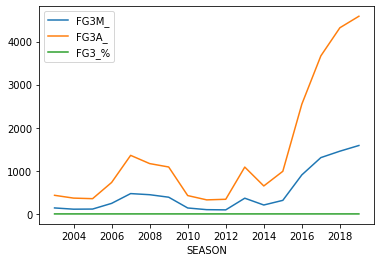

In [76]:
dff.plot(kind='line',x='SEASON')
plt.xlabel('SEASON')

In [77]:
dff2 = df.groupby(["START_POSITION","SEASON","TEAM_ID","TEAM_ABBREVIATION"]).agg(FG3M_=('FG3M','sum'),FG3A_=('FG3A','sum')).reset_index()
dff2 = dff2.loc[dff2['START_POSITION'] == 'C']
dff2["FG3_%"] = dff2["FG3M_"].div(dff2["FG3A_"].values)
dff2["TEAM_ID"] = dff2["TEAM_ID"].astype(int)
dff2

,START_POSITION,SEASON,TEAM_ID,TEAM_ABBREVIATION,FG3M_,FG3A_,FG3_%
0,C,2003,1610612737,ATL,1.0,3.0,0.333333
1,C,2003,1610612738,BOS,22.0,37.0,0.594595
2,C,2003,1610612739,CLE,2.0,7.0,0.285714
3,C,2003,1610612740,NOH,0.0,2.0,0.000000
4,C,2003,1610612741,CHI,2.0,6.0,0.333333
...,...,...,...,...,...,...,...
564,C,2021,1610612762,UTA,1.0,6.0,0.166667
565,C,2021,1610612763,MEM,0.0,3.0,0.000000
566,C,2021,1610612764,WAS,1.0,5.0,0.200000
567,C,2021,1610612765,DET,2.0,13.0,0.153846


In [78]:
df_rank = pd.read_csv ('ranking.csv', index_col=0, delimiter=',', encoding='latin-1')
df_rank['PRESEASON'] = df_rank['SEASON_ID'].astype(str).str[0]
df_rank['SEASON'] = df_rank['SEASON_ID'].astype(str).str[1:]
df_rank['SEASON'] = df_rank['SEASON'].astype(int)
df_rank = df_rank.loc[df_rank['PRESEASON'] == '2']
df_rank = df_rank.loc[df_rank['SEASON'] < 2020]
df_rank = df_rank.groupby(["TEAM_ID","SEASON"]).agg(FINAL_STANDINGS_DATE=('STANDINGSDATE','max'),FINAL_W=('W','max'),FINAL_L=('L','max')).reset_index()
df_rank["FINAL_W_PCT"] = df_rank["FINAL_W"]/(df_rank["FINAL_W"]+df_rank["FINAL_L"])
df_rank['TEAM_SEASON'] = df_rank["TEAM_ID"].astype(str)+df_rank["SEASON"].astype(str)
df_rank

,TEAM_ID,SEASON,FINAL_STANDINGS_DATE,FINAL_W,FINAL_L,FINAL_W_PCT,TEAM_SEASON
0,1610612737,2002,2003-10-04,35,47,0.426829,16106127372002
1,1610612737,2003,2004-10-11,28,54,0.341463,16106127372003
2,1610612737,2004,2005-10-09,13,69,0.158537,16106127372004
3,1610612737,2005,2006-10-04,26,56,0.317073,16106127372005
4,1610612737,2006,2007-10-05,30,52,0.365854,16106127372006
...,...,...,...,...,...,...,...
533,1610612766,2015,2016-09-30,48,34,0.585366,16106127662015
534,1610612766,2016,2017-09-29,36,46,0.439024,16106127662016
535,1610612766,2017,2018-09-27,36,46,0.439024,16106127662017
536,1610612766,2018,2019-09-29,39,43,0.475610,16106127662018


Concatenating TEAM_ID-SEASON to merge dataframes

In [79]:
dff2["TEAM_SEASON"] = dff2["TEAM_ID"].astype(str)+dff2["SEASON"].astype(str)


Merging the datasets (Team standings End of Season with Center 3 pointer metrics by season and team)

In [80]:
dff2 = dff2.get(['TEAM_SEASON','FG3M_','FG3A_','FG3_%'])
df_rank = df_rank.merge(dff2, on='TEAM_SEASON',  how= 'inner')
df_rank

,TEAM_ID,SEASON,FINAL_STANDINGS_DATE,FINAL_W,FINAL_L,FINAL_W_PCT,TEAM_SEASON,FG3M_,FG3A_,FG3_%
0,1610612737,2003,2004-10-11,28,54,0.341463,16106127372003,1.0,3.0,0.333333
1,1610612737,2004,2005-10-09,13,69,0.158537,16106127372004,12.0,25.0,0.480000
2,1610612737,2005,2006-10-04,26,56,0.317073,16106127372005,0.0,2.0,0.000000
3,1610612737,2006,2007-10-05,30,52,0.365854,16106127372006,0.0,1.0,0.000000
4,1610612737,2007,2008-10-04,37,45,0.451220,16106127372007,0.0,5.0,0.000000
...,...,...,...,...,...,...,...,...,...,...
504,1610612766,2015,2016-09-30,48,34,0.585366,16106127662015,13.0,30.0,0.433333
505,1610612766,2016,2017-09-29,36,46,0.439024,16106127662016,27.0,69.0,0.391304
506,1610612766,2017,2018-09-27,36,46,0.439024,16106127662017,1.0,9.0,0.111111
507,1610612766,2018,2019-09-29,39,43,0.475610,16106127662018,10.0,28.0,0.357143


Getting the correlation matrix by season (3pt% and win %)

SEASON       
2003    FG3_%   -0.000375
2004    FG3_%   -0.347473
2005    FG3_%    0.080769
2006    FG3_%   -0.200077
2007    FG3_%   -0.150642
2008    FG3_%    0.185481
2009    FG3_%    0.215695
2010    FG3_%    0.085511
2011    FG3_%    0.048771
2012    FG3_%    0.017760
2013    FG3_%    0.044173
2014    FG3_%   -0.045930
2015    FG3_%   -0.007831
2016    FG3_%   -0.378768
2017    FG3_%   -0.132847
2018    FG3_%   -0.093697
2019    FG3_%    0.405240
Name: FINAL_W_PCT, dtype: float64


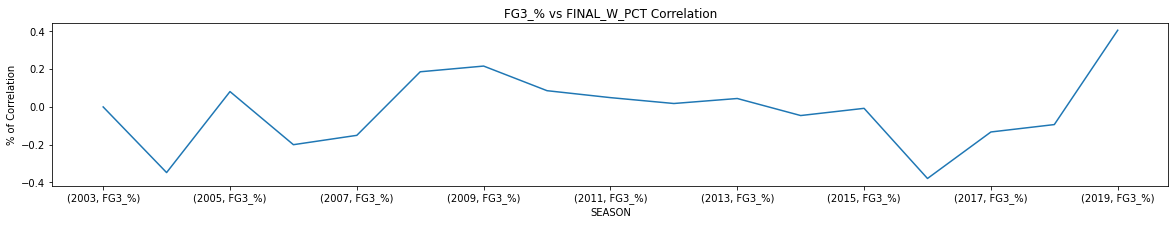

In [156]:
df_corr_3_PERC = df_rank.groupby('SEASON')[['FINAL_W_PCT','FG3_%']].corr()#.iloc[0::2,-1]
df_corr_3_PERC = df_corr_3_PERC.loc[df_corr_3_PERC['FINAL_W_PCT'] != 1]
df_corr_3_PERC = df_corr_3_PERC['FINAL_W_PCT']
df_corr_3_PERC
ax = df_corr_3_PERC.plot(figsize=(20,3))
ax.set_xlabel("SEASON")
ax.set_ylabel("% of Correlation")
ax.set_title("FG3_% vs FINAL_W_PCT Correlation")
print(df_corr_3_PERC)

Getting the correlation matrix by season (3pts made and win %)

SEASON       
2003    FG3M_    0.190210
2004    FG3M_   -0.066551
2005    FG3M_   -0.026401
2006    FG3M_    0.123737
2007    FG3M_    0.260755
2008    FG3M_    0.026680
2009    FG3M_    0.144722
2010    FG3M_   -0.266083
2011    FG3M_   -0.278924
2012    FG3M_    0.316949
2013    FG3M_   -0.157312
2014    FG3M_    0.033283
2015    FG3M_    0.020316
2016    FG3M_   -0.298331
2017    FG3M_   -0.047794
2018    FG3M_    0.238317
2019    FG3M_    0.294730
Name: FINAL_W_PCT, dtype: float64


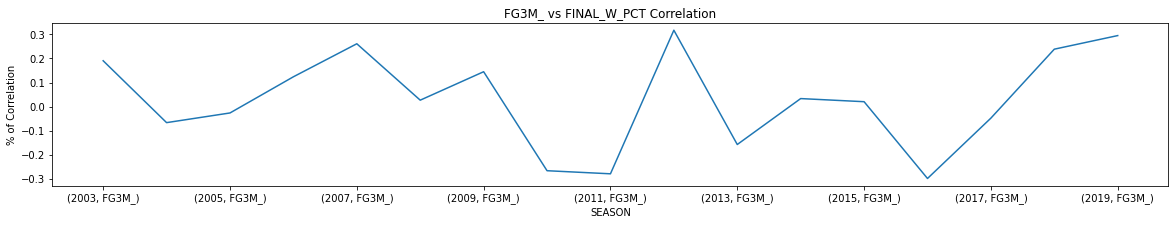

In [157]:
df_corr_3_M = df_rank.groupby('SEASON')[['FINAL_W_PCT','FG3M_']].corr()#.iloc[0::2,-1]
df_corr_3_M = df_corr_3_M.loc[df_corr_3_M['FINAL_W_PCT'] < .99999]
df_corr_3_M = df_corr_3_M['FINAL_W_PCT']
ax = df_corr_3_M.plot(figsize=(20,3))
ax.set_xlabel("SEASON")
ax.set_ylabel("% of Correlation")
ax.set_title("FG3M_ vs FINAL_W_PCT Correlation")
print(df_corr_3_M)

Creating FG (from 2 pt range) metrics to compare vs. FG 3 pointer metrics

In [108]:
df['FG2A_'] = df['FGA']-df['FG3A']
df['FG2M_'] = df['FGM']-df['FG3M']

3pt metrics vs 2 pt metrics by season (analyzing trends)

    SEASON    FG3M_    FG3A_    FG2M_     FG2A_     FG3_%     FG2_%
0     2003  13245.0  38349.0  76243.0  166192.0  0.345381  0.458765
1     2004  15219.0  42879.0  82220.0  175045.0  0.354929  0.469708
2     2005  16241.0  45568.0  85775.0  179650.0  0.356412  0.477456
3     2006  17082.0  48015.0  85772.0  177169.0  0.355764  0.484125
4     2007  18263.0  50614.0  85913.0  178287.0  0.360829  0.481880
5     2008  18797.0  51500.0  85994.0  177867.0  0.364990  0.483474
6     2009  18230.0  51580.0  88149.0  179742.0  0.353432  0.490420
7     2010  18264.0  51186.0  86509.0  178544.0  0.356816  0.484525
8     2011  14028.0  40464.0  65979.0  138666.0  0.346679  0.475812
9     2012  20251.0  56766.0  84419.0  175426.0  0.356745  0.481223
10    2013  22020.0  61492.0  84661.0  174263.0  0.358095  0.485823
11    2014  22337.0  63972.0  83469.0  172381.0  0.349168  0.484212
12    2015  24179.0  68664.0  83240.0  170241.0  0.352135  0.488954
13    2016  27069.0  75920.0  82144.0  163575.0 

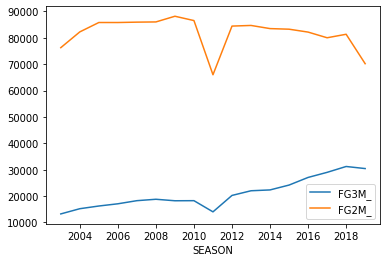

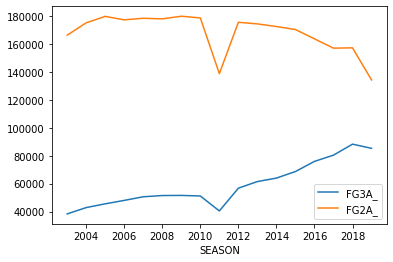

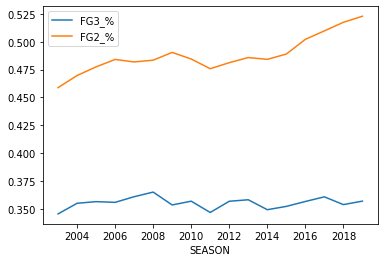

In [145]:
df3 = df.groupby(["SEASON"]).agg(FG3M_=('FG3M','sum'),FG3A_=('FG3A','sum'),FG2M_=('FG2M_','sum'),FG2A_=('FG2A_','sum')).reset_index()
df3 = df3.loc[df3['SEASON'] < 2020]
df3['FG3_%'] = df3['FG3M_']/df3['FG3A_']
df3['FG2_%'] = df3['FG2M_']/df3['FG2A_']
df3.plot(x='SEASON',y=['FG3M_','FG2M_'])
df3.plot(x='SEASON',y=['FG3A_','FG2A_'])
df3.plot(x='SEASON',y=['FG3_%','FG2_%'])
print(df3)

           FG3M_     FG3A_     FG2M_     FG2A_     FG3_%     FG2_%
SEASON                                                            
2003         NaN       NaN       NaN       NaN       NaN       NaN
2004    0.149037  0.118126  0.078394  0.053270  0.027646  0.023854
2005    0.067153  0.062711  0.043238  0.026308  0.004179  0.016496
2006    0.051783  0.053700 -0.000035 -0.013810 -0.001820  0.013968
2007    0.069137  0.054129  0.001644  0.006310  0.014238 -0.004637
2008    0.029239  0.017505  0.000943 -0.002356  0.011533  0.003306
2009   -0.030164  0.001553  0.025060  0.010542 -0.031669  0.014367
2010    0.001865 -0.007639 -0.018605 -0.006665  0.009577 -0.012020
2011   -0.231932 -0.209471 -0.237316 -0.223351 -0.028412 -0.017981
2012    0.443613  0.402877  0.279483  0.265097  0.029038  0.011371
2013    0.087354  0.083254  0.002867 -0.006630  0.003785  0.009560
2014    0.014396  0.040330 -0.014080 -0.010800 -0.024929 -0.003316
2015    0.082464  0.073345 -0.002744 -0.012414  0.008496  0.00

<AxesSubplot:title={'center':'FG2A_ and FG3A_ % change by season'}, xlabel='SEASON', ylabel='%change'>

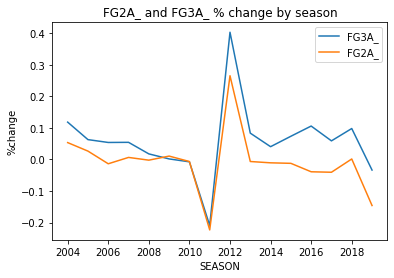

In [159]:
df4 = df3.set_index(['SEASON'])
df4 = df4.pct_change()
print(df4)
df4.plot(y=['FG3A_','FG2A_'], title="FG2A_ and FG3A_ % change by season", ylabel= "%change")


Main drivers (Teams) of 3 pointer change for 2012 season

In [195]:
df5 = df.loc[df['SEASON'] == 2012]
df5 = df.groupby(["TEAM_ABBREVIATION"]).agg(FG3A_=('FG3A','sum'),FG2A_=('FG2A_','sum')).reset_index()
df6 = df.groupby(["TEAM_ABBREVIATION","PLAYER_NAME"]).agg(FG3A_=('FG3A','sum'),FG2A_=('FG2A_','sum')).reset_index()
df5 = df5.sort_values(by='FG3A_', ascending=False)
df5['FG3A_'] = df5['FG3A_'].astype(float)
df5['FG3A_PERC'] = (df5['FG3A_'] / df5['FG3A_'].sum())
df5.index = df5['TEAM_ABBREVIATION']
df5
#print(df6.sort_values(by='FG3A_', ascending=False))

,TEAM_ABBREVIATION,FG3A_,FG2A_,FG3A_PERC
TEAM_ABBREVIATION,,,,
HOU,HOU,48716.0,91086.0,0.043825
GSW,GSW,43907.0,101180.0,0.039498
DAL,DAL,40876.0,100330.0,0.036772
BOS,BOS,39874.0,103580.0,0.035870
PHX,PHX,39823.0,100661.0,0.035824
MIA,MIA,39493.0,101807.0,0.035528
LAL,LAL,39204.0,105761.0,0.035268
TOR,TOR,38661.0,98625.0,0.034779
CLE,CLE,38562.0,101644.0,0.034690
